<a href="https://colab.research.google.com/github/ShubhamPrakash108/project1/blob/main/%F0%9F%90%BE_Predict_Pet_Adoption_Status%F0%9F%90%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'predict-pet-adoption-status-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5242440%2F8746362%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240707%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240707T110427Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4395a0617b35e94b386006c8cfe3f831f555e0d39f0c3e853f0bf155632e3b53f921ec67c22efe742f52d2012d888f3030731a38660eaed8f961a52f2ab7c93c79627a25324d01d39df8426dfdd6967829a590b4bcd04387b9c2ea928bba3b71e06aa9f3da6cad421508d867d7f80788b5d8bc5228cab191742ed27dd1122427867840811902c320f2b164fde21a28c5592cd1fdb1630d582db6056f67d4864adccdea89d56f04409c4e2363a0d754aa87e54ced4e21d3861397903a140b11b9ae8b650f1e4237e09c9085b9f1c4fbca0bf24807c5783f3324540f5b52fcf6cfa6066a97bb92b566489b38fff3a0d72092039e2899533985591b5dcb04ffd459'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 44639 bytes downloaded
Downloaded and uncompressed: predict-pet-adoption-status-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv


Dataset Description:
The Pet Adoption Dataset provides a comprehensive look into various factors that can influence the likelihood of a pet being adopted from a shelter. This dataset includes detailed information about pets available for adoption, covering various characteristics and attributes.

Features:
PetID: Unique identifier for each pet.
PetType: Type of pet (e.g., Dog, Cat, Bird, Rabbit).
Breed: Specific breed of the pet.
AgeMonths: Age of the pet in months.
Color: Color of the pet.
Size: Size category of the pet (Small, Medium, Large).
WeightKg: Weight of the pet in kilograms.
Vaccinated: Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
HealthCondition: Health condition of the pet (0 - Healthy, 1 - Medical condition).
TimeInShelterDays: Duration the pet has been in the shelter (days).
AdoptionFee: Adoption fee charged for the pet (in dollars).
PreviousOwner: Whether the pet had a previous owner (0 - No, 1 - Yes).
AdoptionLikelihood: Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#reading the csv file
pet_data = pd.read_csv("/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv")
pet_data.sample(5)

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
1087,1587,Dog,Golden Retriever,101,White,Large,4.929341,1,0,37,498,0,0
513,1013,Cat,Siamese,94,Orange,Large,19.848611,0,0,33,71,0,0
1131,1631,Cat,Siamese,56,Black,Medium,14.117107,1,0,6,406,0,1
1246,1746,Bird,Parakeet,147,Orange,Medium,23.049038,1,0,31,59,0,1
736,1236,Rabbit,Rabbit,46,Gray,Medium,18.691257,1,0,38,356,0,1


#Understanding the Data

In [ ]:
#taking overview of the data
pet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [ ]:
#PetID is redundent
pet_data.drop('PetID', axis=1, inplace=True)

In [ ]:
#finding any duplicate row in the dataset
pet_data.duplicated().sum()

0

In [ ]:
pet_data.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [ ]:
# Changing the column into numbers
from sklearn import preprocessing
lr = preprocessing.LabelEncoder()
pet_data['PetType'] = lr.fit_transform(pet_data['PetType'])
pet_data['Breed'] = lr.fit_transform(pet_data['Breed'])
pet_data['Color'] = lr.fit_transform(pet_data['Color'])
pet_data['Size'] = lr.fit_transform(pet_data['Size'])

In [ ]:
pet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             2007 non-null   int64  
 1   Breed               2007 non-null   int64  
 2   AgeMonths           2007 non-null   int64  
 3   Color               2007 non-null   int64  
 4   Size                2007 non-null   int64  
 5   WeightKg            2007 non-null   float64
 6   Vaccinated          2007 non-null   int64  
 7   HealthCondition     2007 non-null   int64  
 8   TimeInShelterDays   2007 non-null   int64  
 9   AdoptionFee         2007 non-null   int64  
 10  PreviousOwner       2007 non-null   int64  
 11  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 188.3 KB


#EDA

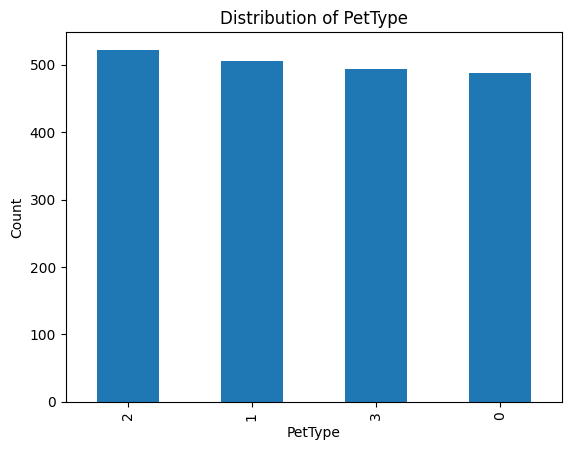

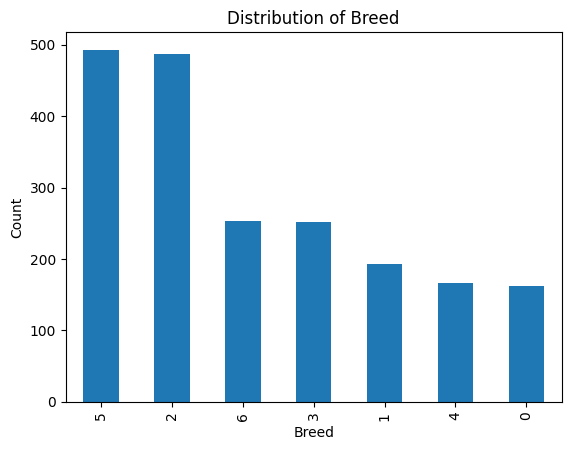

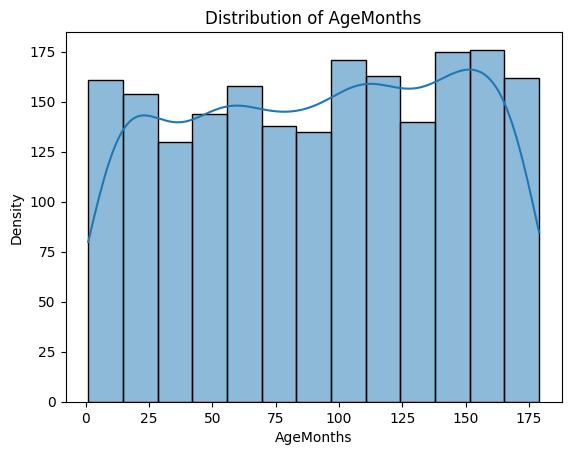

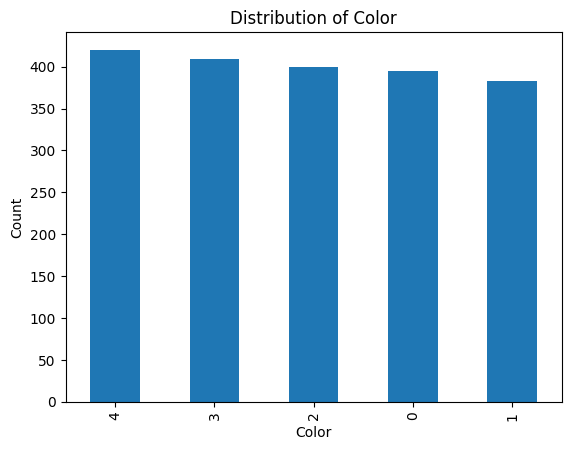

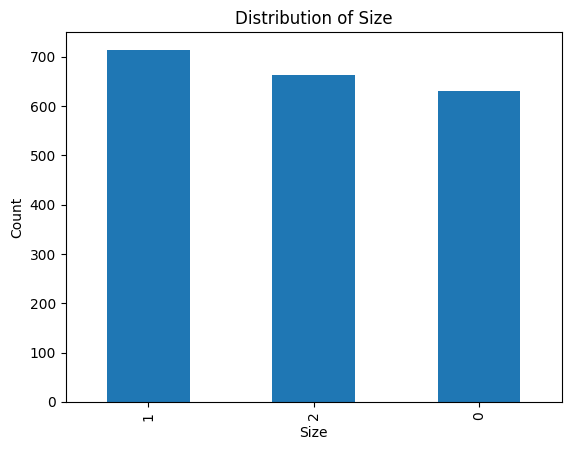

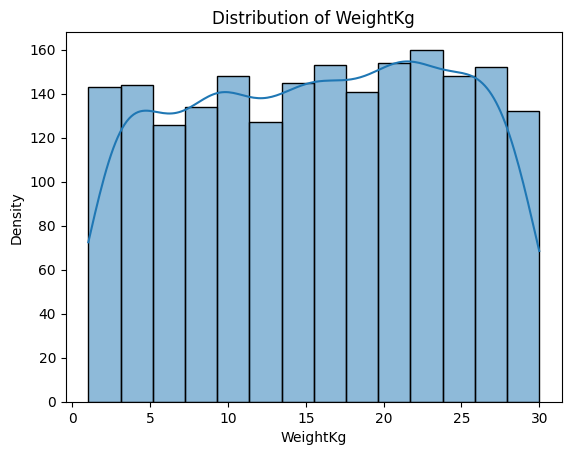

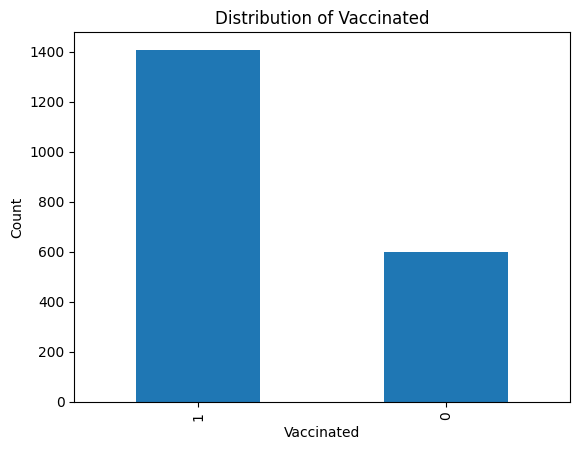

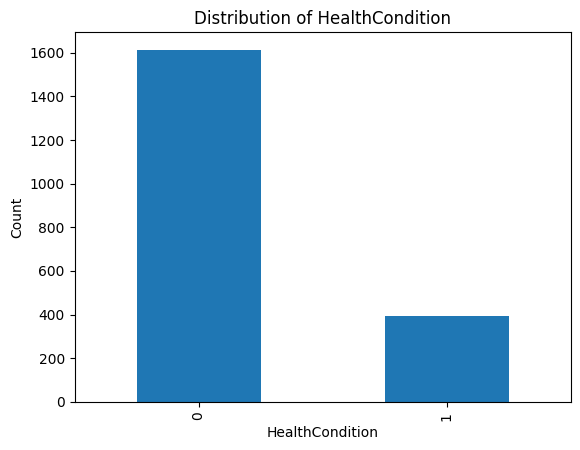

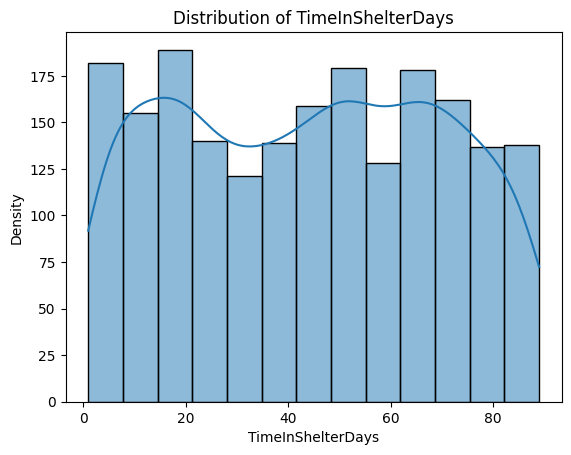

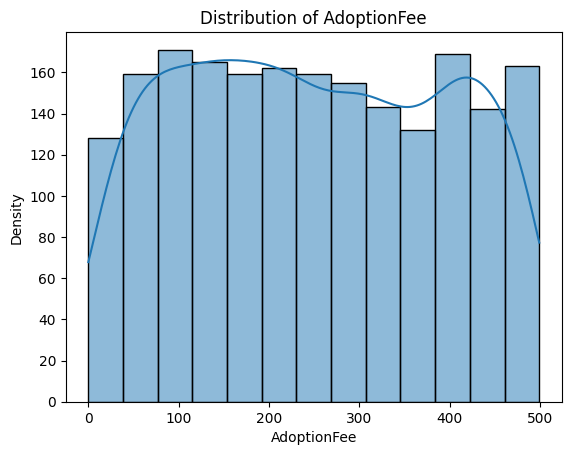

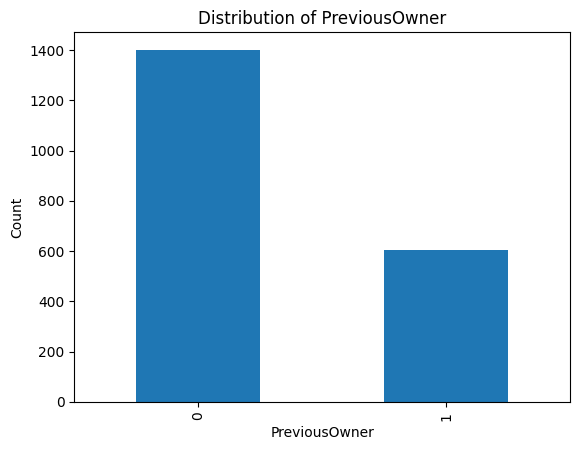

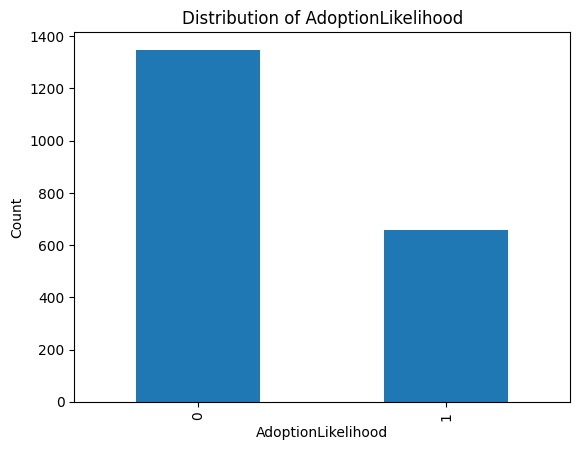

In [ ]:
#Plotting the data and inspecting the data distribution
for column_name in pet_data.columns:
    if pet_data[column_name].dtype == "int64" or pet_data[column_name].dtype == "float64":
        if len(pet_data[column_name].unique()) < 10:
            pet_data[column_name].value_counts().plot(kind='bar')
        else:
            sns.histplot(pet_data[column_name], kde=True)

        plt.title(f"Distribution of {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Count" if len(pet_data[column_name].unique()) < 10 else "Density")
        plt.show()

In [ ]:
#Corretation states which columns affects the other columns
pet_data.corr()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
PetType,1.000000,0.355265,0.031115,0.004541,0.016938,-0.003249,-0.008617,0.005170,0.032509,-0.049594,-0.014978,0.009344
Breed,0.355265,1.000000,0.008304,-0.007701,0.007626,0.022387,-0.001563,0.031235,-0.004295,-0.032393,0.011653,-0.118092
AgeMonths,0.031115,0.008304,1.000000,-0.002000,0.012097,-0.029189,-0.001801,0.017200,0.036837,-0.038129,0.034943,-0.202209
Color,0.004541,-0.007701,-0.002000,1.000000,-0.002732,0.022291,-0.009409,0.053059,-0.039995,-0.040778,0.000804,-0.028351
Size,0.016938,0.007626,0.012097,-0.002732,1.000000,-0.008784,0.002530,-0.010127,0.033992,-0.051126,-0.001304,0.012117
WeightKg,-0.003249,0.022387,-0.029189,0.022291,-0.008784,1.000000,0.022526,0.000708,-0.000980,-0.002367,-0.049155,0.017601
Vaccinated,-0.008617,-0.001563,-0.001801,-0.009409,0.002530,0.022526,1.000000,0.024079,-0.001123,0.021662,-0.011460,0.301311
HealthCondition,0.005170,0.031235,0.017200,0.053059,-0.010127,0.000708,0.024079,1.000000,-0.012664,-0.002537,0.013755,-0.244061
TimeInShelterDays,0.032509,-0.004295,0.036837,-0.039995,0.033992,-0.000980,-0.001123,-0.012664,1.000000,-0.007104,0.007958,0.008867
AdoptionFee,-0.049594,-0.032393,-0.038129,-0.040778,-0.051126,-0.002367,0.021662,-0.002537,-0.007104,1.000000,0.009755,-0.005486


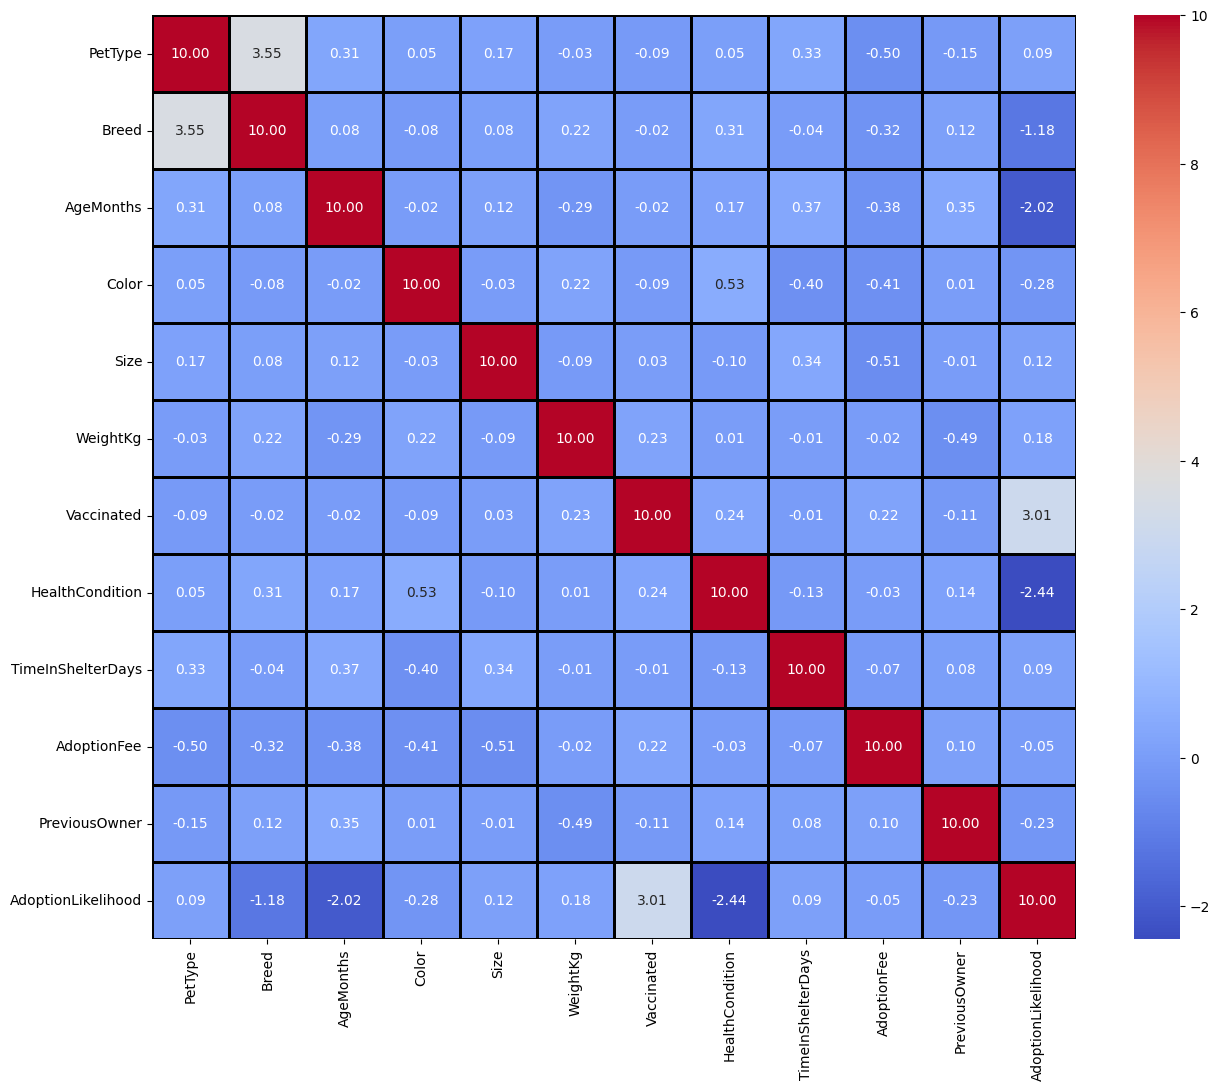

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(pet_data.corr()*10,annot=True,cmap='coolwarm',fmt='.2f',linewidths=1,linecolor='black',square=True)
plt.show()

#Data preprocessing

In [ ]:
#train test split for model training and evalution
from sklearn.model_selection import train_test_split

X= pet_data.drop('AdoptionLikelihood',axis=1)
y=pet_data['AdoptionLikelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108)

In [ ]:
# Preprocessing the data is important to keep the distribution of data in one range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled,X_test_scaled

(array([[0.        , 0.33333333, 0.2247191 , ..., 0.65909091, 0.29659319,
         0.        ],
        [0.33333333, 0.5       , 0.46629213, ..., 0.75      , 0.72945892,
         0.        ],
        [0.        , 0.33333333, 0.85955056, ..., 0.76136364, 0.10821643,
         0.        ],
        ...,
        [1.        , 0.83333333, 0.51123596, ..., 0.93181818, 0.49298597,
         0.        ],
        [1.        , 0.83333333, 0.83707865, ..., 0.13636364, 0.82364729,
         1.        ],
        [0.        , 0.33333333, 0.19101124, ..., 0.10227273, 0.01002004,
         0.        ]]),
 array([[0.33333333, 1.        , 0.45505618, ..., 0.22727273, 0.29058116,
         0.        ],
        [0.66666667, 0.        , 0.96629213, ..., 0.65909091, 0.78356713,
         1.        ],
        [0.66666667, 0.        , 0.91011236, ..., 0.23863636, 0.13226453,
         0.        ],
        ...,
        [0.        , 0.33333333, 0.75842697, ..., 0.375     , 0.4248497 ,
         0.        ],
        [0.6

#Modeling and Experimentation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


scaler = MinMaxScaler()

# Define the models and their names
models = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('XGBoost', XGBClassifier()),
    ('RandomForest2', RandomForestClassifier(n_estimators=100, max_depth=5)),
    ('GradientBoosting2', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
]

# Create a pipeline for each model
pipelines = []
for model_name, model in models:
    pipeline = Pipeline([
        ('scaler', scaler),
        (model_name, model)
    ])
    pipelines.append((model_name, pipeline))

model_scores = []

for model_name, pipeline in pipelines:
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Calculate mean score across folds
    mean_score = np.mean(scores)

    # Store model name and mean score
    model_scores.append((model_name, mean_score))

# Sort models based on mean score (accuracy)
model_scores.sort(key=lambda x: x[1], reverse=True)

# Print top 10 models based on accuracy
print("Top 10 Models based on Accuracy:")
for rank, (model_name, mean_score) in enumerate(model_scores[:10], 1):
    print(f"Rank {rank}: {model_name} - Mean Accuracy: {mean_score:.4f}")


Top 10 Models based on Accuracy:
Rank 1: GradientBoosting - Mean Accuracy: 0.9252
Rank 2: GradientBoosting2 - Mean Accuracy: 0.9252
Rank 3: RandomForest - Mean Accuracy: 0.9209
Rank 4: XGBoost - Mean Accuracy: 0.9190
Rank 5: RandomForest2 - Mean Accuracy: 0.9059
Rank 6: SVM - Mean Accuracy: 0.8604
Rank 7: DecisionTree - Mean Accuracy: 0.8604
Rank 8: KNN - Mean Accuracy: 0.8361
Rank 9: GaussianNB - Mean Accuracy: 0.7882
Rank 10: LogisticRegression - Mean Accuracy: 0.7377


In [ ]:
#Now evaluating the best model on the X_test_scaled
best_model_name = model_scores[0][0]
best_pipeline = next(pipeline for name, pipeline in pipelines if name == best_model_name)
best_pipeline.fit(X_train_scaled, y_train)
y_pred = best_pipeline.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.9402985074626866


In [ ]:
#calculating precision,recall,f1-score and support
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       279
           1       0.95      0.85      0.90       123

    accuracy                           0.94       402
   macro avg       0.94      0.92      0.93       402
weighted avg       0.94      0.94      0.94       402



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[273   6]
 [ 18 105]]


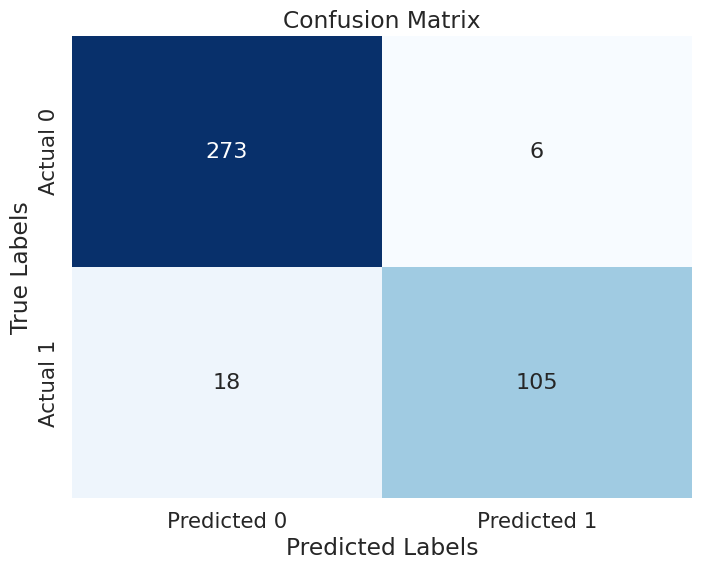

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
